In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [13]:
Data_train = pd.read_csv('E:\hamid\hushe masnue imt1\Data\Mobile classification/train.csv')
Data_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

#### Dataset as 21 features and 2000 entries

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)-

In [14]:
# Import data test for prediction by models

Data_test = pd.read_csv('E:\\hamid\hushe masnue imt1\Data\Mobile classification/test.csv')
Data_test.drop('id',axis=1, inplace=True)
Data_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 20 columns]

In [15]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Do not have any Missing values and all columns numerical

In [16]:
Data_train.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

# Check Noise

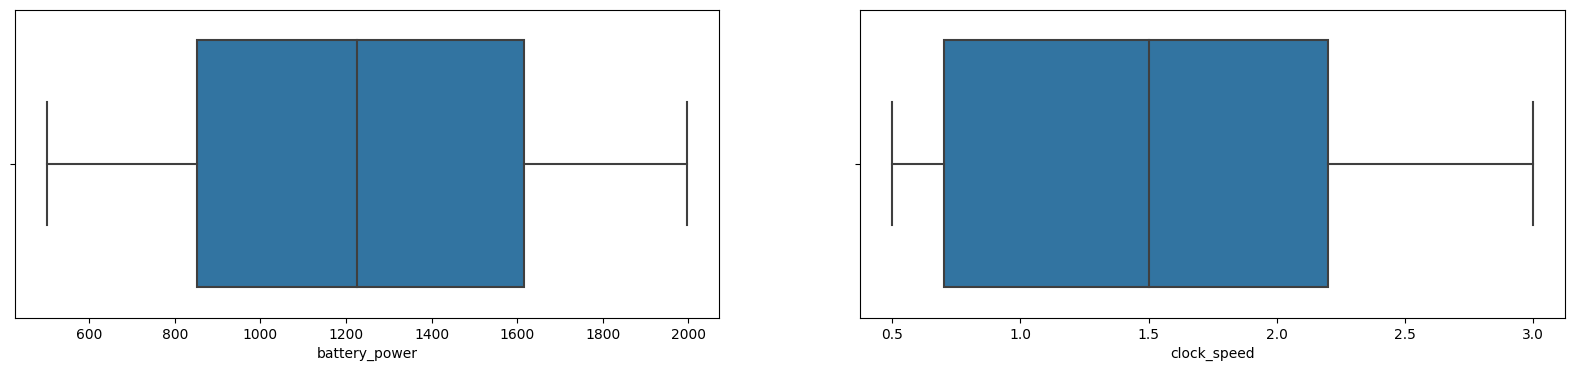

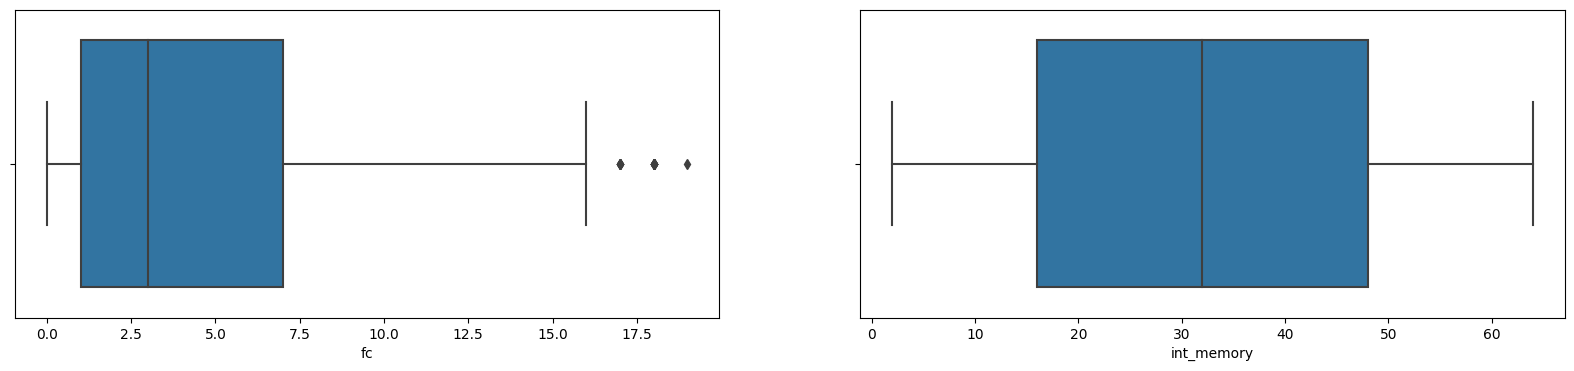

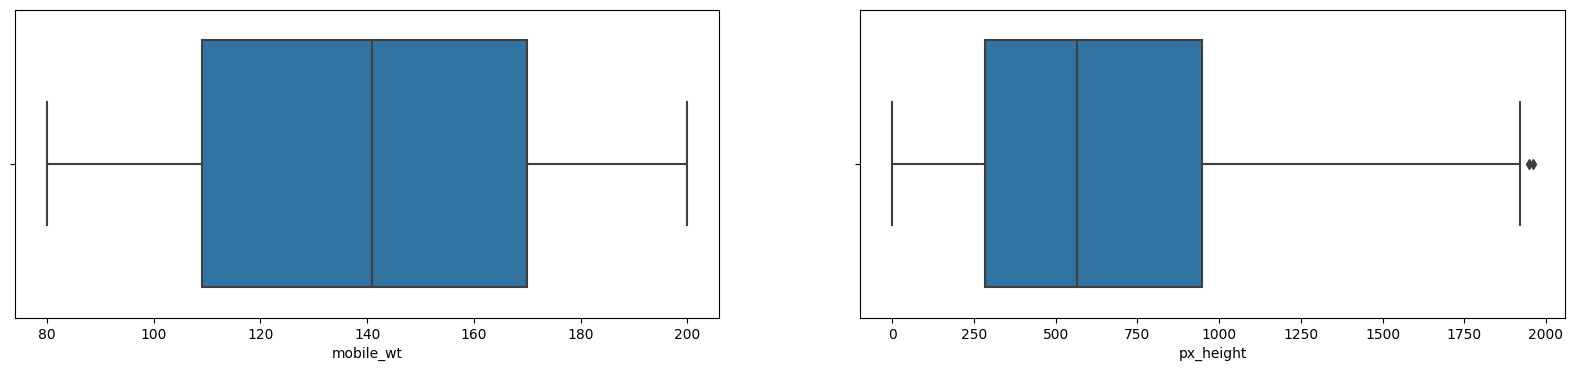

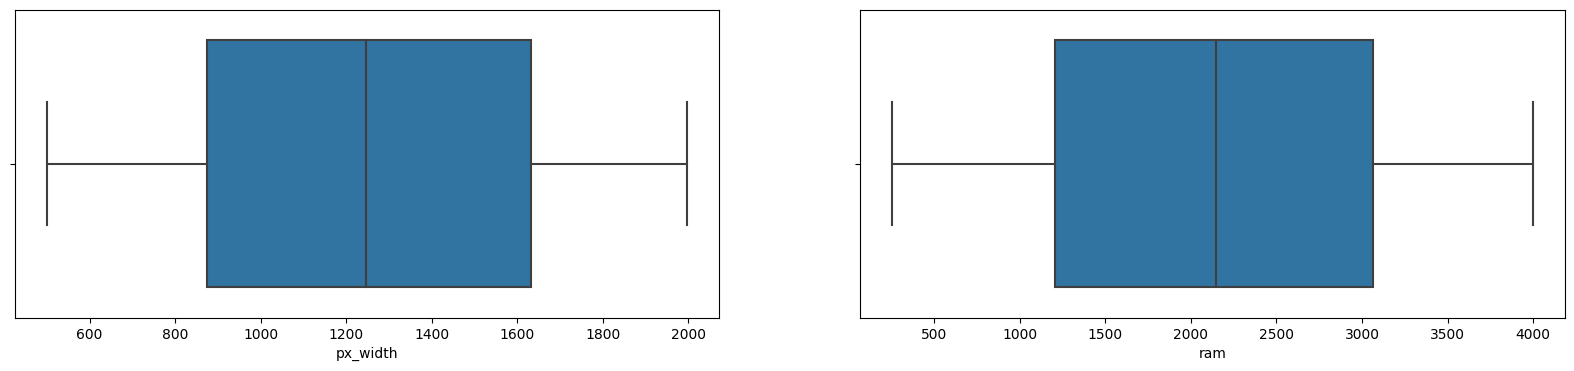

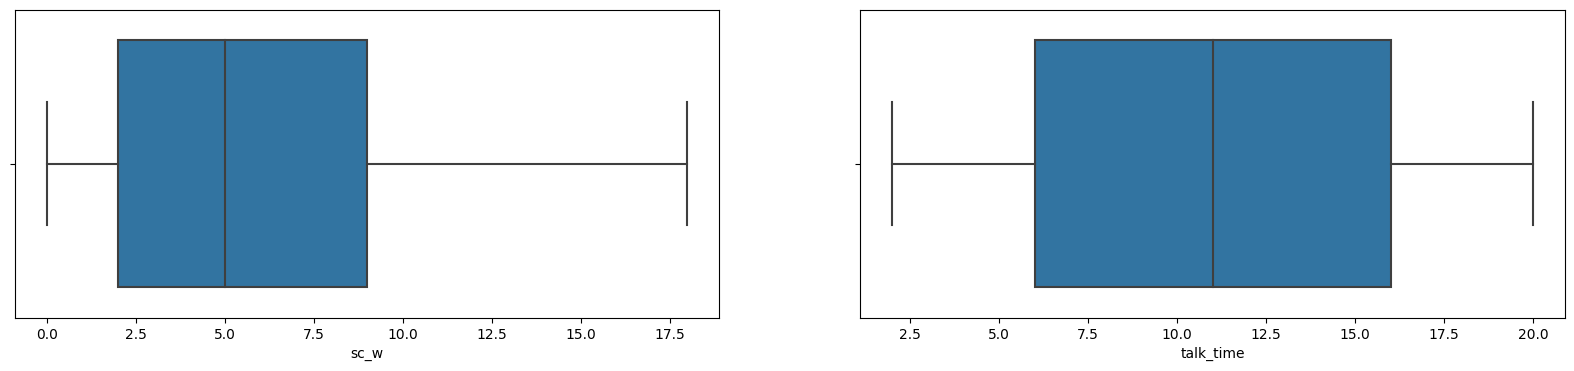

In [17]:
# Make a loop for numerical columns scatter plot

some_features =['battery_power','clock_speed','fc','int_memory','mobile_wt','px_height','px_width','ram','sc_w','talk_time']


i = 0
while i < 10 :
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x = some_features[i], data=Data_train)
    i += 1
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x = some_features[i], data=Data_train)
    i += 1
    if i == 10 :
        break
    
    plt.show()
    

### Some features have questionable data , They should be asked from the employer and the data range of the features should be specified

In [18]:
# clean some noise from 3 features

df = Data_train[Data_train.m_dep> 0] # we do not have mobile depth zero
df2 = df[df.px_height > 0] # we do not have mobile pixel height zero
Data_train_new = df2[df2.sc_w > 0] # we do not have mobile screen width zero
Data_train_new.reset_index(inplace=True, drop='index') # reset index after cleaning noises

In [19]:
Data_train_new

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1814            794     1          0.5         1   0       1           2   
1815           1965     1          2.6         1   0       0          39   
1816           1911     0          0.9         1   1       1          36   
1817           1512     0          0.9         0   4       1          46   
1818            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1814    0.8        106        6  ...       1222      1890   668    13     4   
1815    0.2        187        4  ...        915      1965  2032    11    10   
1816    0.7        108        8  ...        868      1632  3057     9     1   
1817    0.1        145        5  ...        336       670   869    18    10   
1818    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1814         19        1             1     0            0  
1815         16        1             1     1            2  
1816          5        1             1     0            3  
1817         19        1             1     1            0  
1818          2        1             1     1            3  

[1819 rows x 21 columns]

# Correlation


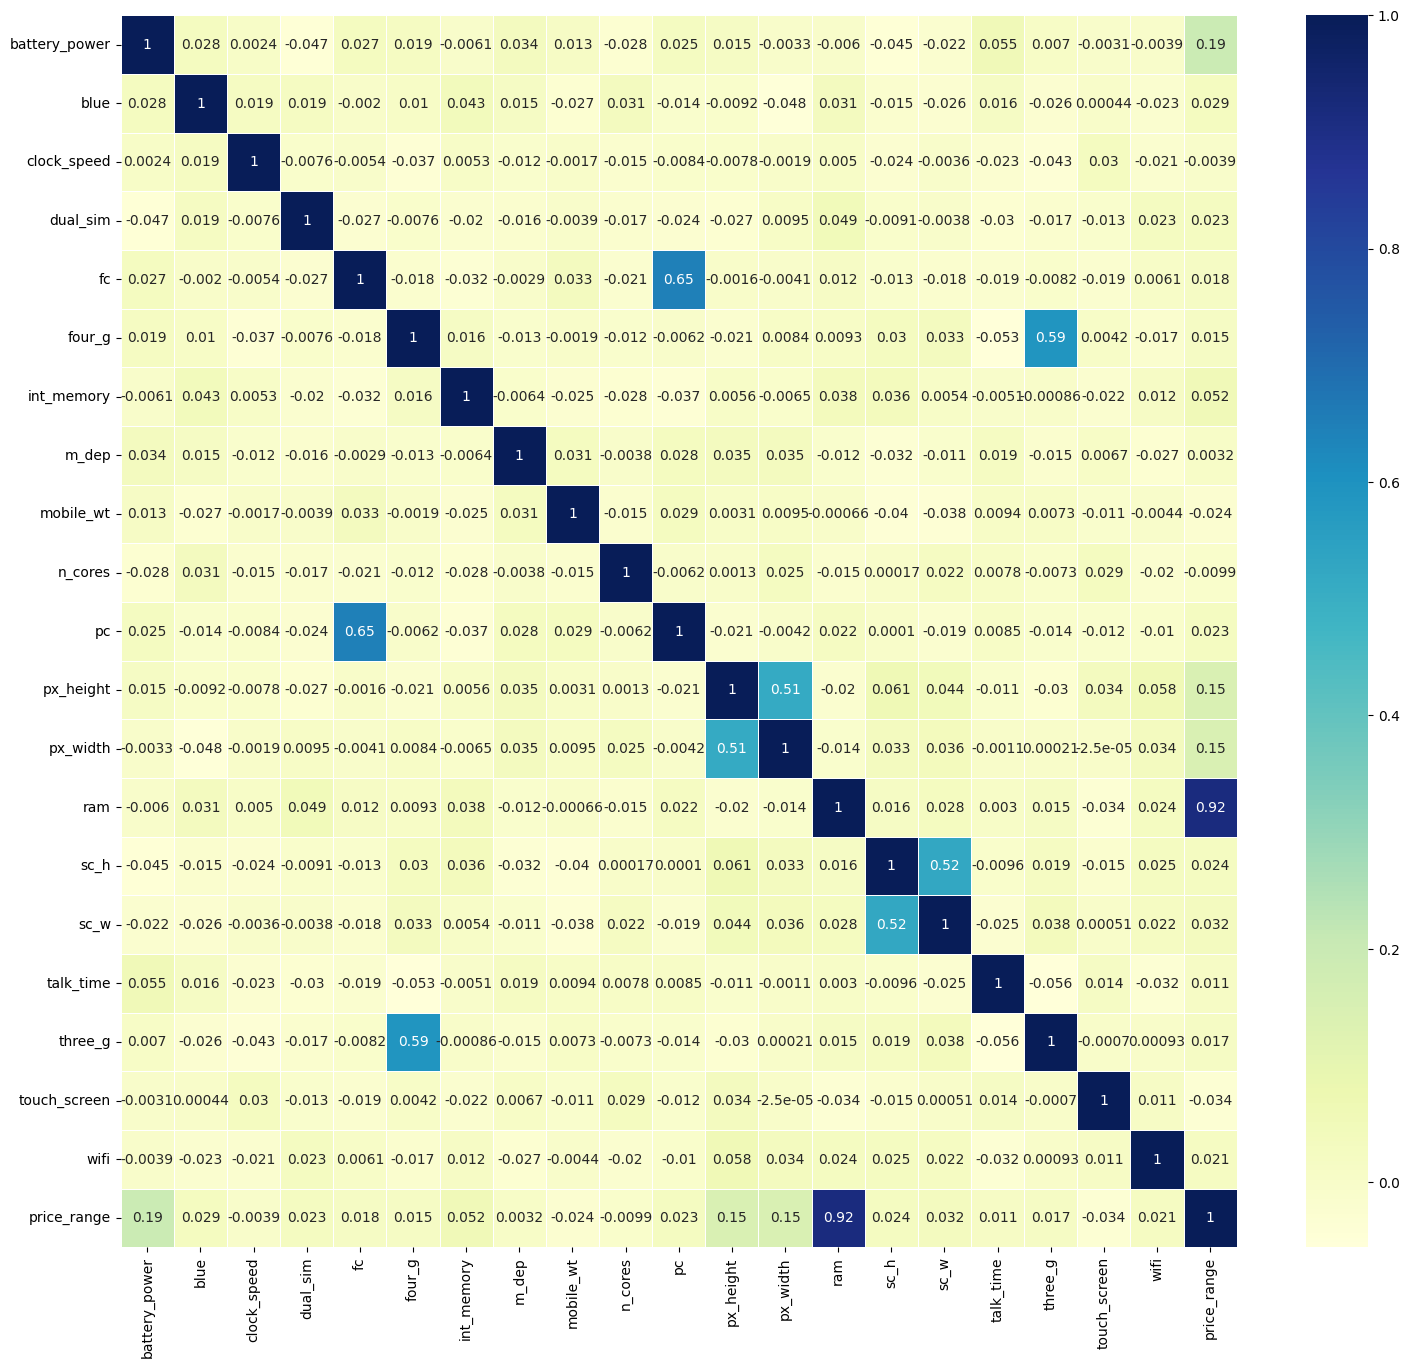

In [20]:
plt.figure(figsize=(18,16))
ax = sns.heatmap(Data_train_new.corr(), cmap="YlGnBu", annot=True, linewidths=0.5)
plt.show()

# Visualizing Features

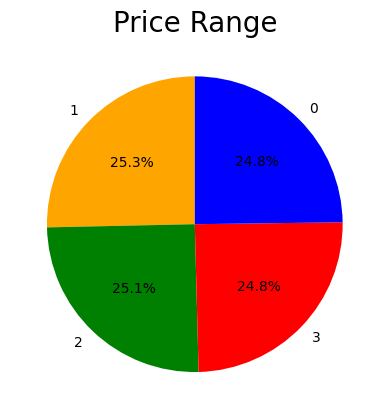

In [21]:
# pie plot Price range
labels = Data_train_new.price_range.unique() # specifie unique price range
sizes = Data_train_new.price_range.value_counts() # count each unique values price range
    

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=['orange','green','red','blue'],
         startangle=90)
plt.title('Price Range', fontsize=20)
plt.savefig('E:\hamid\hushe masnue imt1\Data\Mobile classification\pie pricerange.jpg')
plt.show()

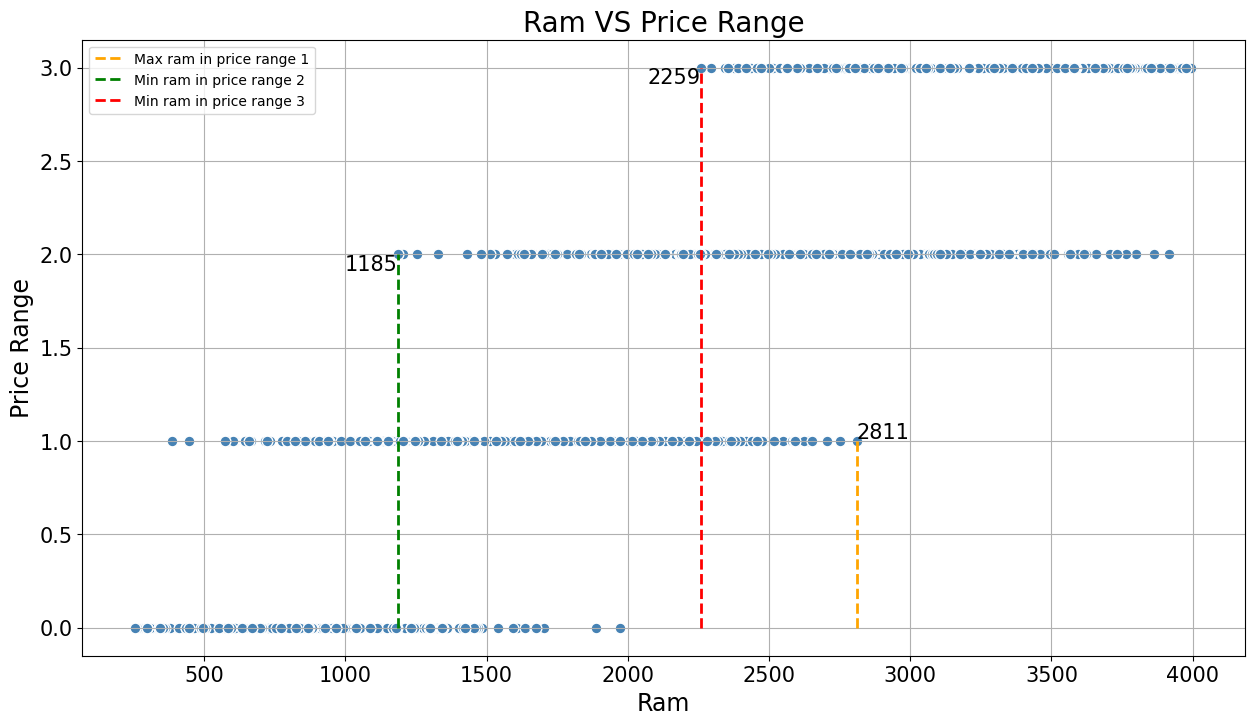

In [22]:
# Scatter plot ram 
plt.figure(figsize=(15,8))
# Scatter plot ram vs price range
plt.scatter(Data_train_new.ram, Data_train_new.price_range, color='steelblue', edgecolor = 'white', s=60)
# plot vertical line for max ram in price range 1
plt.vlines(ymin=0, ymax=1, x = Data_train_new[Data_train_new.price_range == 1].ram.max(), color = 'orange',
          linewidth = 2, label = 'Max ram in price range 1', linestyle = 'dashed')
# show number of max ram in price range 1
plt.text(Data_train_new[Data_train_new.price_range == 1].ram.max(), 1.1,
         str(Data_train_new[Data_train_new.price_range == 1].ram.max()),ha='left',  va='top', fontsize=15)
# plot vertical line for min ram in price range 2
plt.vlines(ymin=0, ymax=2, x = Data_train_new[Data_train_new.price_range == 2].ram.min(), color = 'green',
          linewidth = 2, label = 'Min ram in price range 2', linestyle = 'dashed')
# show number of min ram in price range 2
plt.text(Data_train_new[Data_train_new.price_range == 2].ram.min(), 2,
         str(Data_train_new[Data_train_new.price_range == 2].ram.min()),ha='right',  va='top', fontsize=15)
# plot vertical line for min ram in price range 3
plt.vlines(ymin=0, ymax=3, x = Data_train_new[Data_train_new.price_range == 3].ram.min(), color = 'red',
          linewidth = 2, label = 'Min ram in price range 3', linestyle = 'dashed')
# show number of min ram in price range 3
plt.text(Data_train_new[Data_train_new.price_range == 3].ram.min(), 3,
         str(Data_train_new[Data_train_new.price_range == 3].ram.min()),ha='right',  va='top', fontsize=15)



plt.title("Ram VS Price Range", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ram', fontsize=17)
plt.ylabel("Price Range", fontsize=17)
plt.grid()
plt.legend()
plt.savefig('E:\hamid\hushe masnue imt1\Data\Mobile classification\scatter Ram.jpg')
plt.show()

# ------------------------------------------- Modeling ----------------------------------------------------

## Decision Tree

In [23]:
x = Data_train_new.drop('price_range',axis=1) # creat x
y = Data_train_new.price_range.values.reshape(-1,1) # creat y and normalized -1,1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1) # split x,y

### Make Model by GridsearchCV

In [24]:
# GridSearchCV for DTS by accuracy evaluate

parameters = [{"criterion": ["gini", "entropy"], 'max_depth':range(3,200)}] # parameters for DTS
grid_kn = GridSearchCV(estimator=DecisionTreeClassifier(), # Model
                      param_grid= parameters, # Range of depth and ceriterion
                      scoring='accuracy', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1)

grid_kn.fit(x_train, y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 394 candidates, totalling 1970 fits


{'criterion': 'entropy', 'max_depth': 113}

In [25]:
# split data by best test size 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [26]:
# Creat Decision tree model by best parameters from gridsearchCV (DTS) by new split x,y by new test size and max_depth from check over fitting

DTS = DecisionTreeClassifier(criterion='entropy', max_depth=113, random_state=0)
DTS.fit(x_train, y_train.ravel())

y_pred_DTS = DTS.predict(x_test) # predict price range for x_test 
DTS_Accuracy = metrics.accuracy_score(y_test, y_pred_DTS)
print('DTS Accuracy test data : ', DTS_Accuracy) # Calculate accuracy by new test size

DTS Accuracy test data :  0.8483516483516483


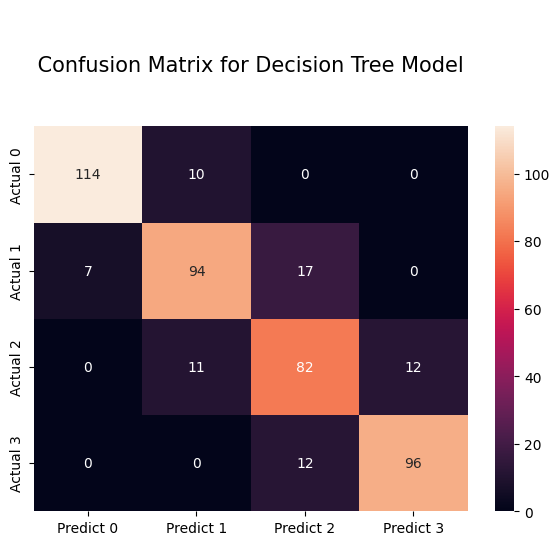


 ---------------- Classification Report DTS -------------------

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       124
           1       0.82      0.80      0.81       118
           2       0.74      0.78      0.76       105
           3       0.89      0.89      0.89       108

    accuracy                           0.85       455
   macro avg       0.85      0.85      0.85       455
weighted avg       0.85      0.85      0.85       455



In [27]:
# confusion matrix for test data

confus_matrix = confusion_matrix(y_test, y_pred_DTS) # confusion matrix for test data
# creat labels for column and row heat map matrix
DT_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1","Actual 2","Actual 3"]], columns = [i for i in ["Predict 0", "Predict 1","Predict 2", "Predict 3"]])
plt.figure(figsize=(7,5)) 
plt.title('\n\n Confusion Matrix for Decision Tree Model \n\n ', size=15)
sns.heatmap(DT_cm_df, annot=True, fmt='g') # creat heatmap for confusion matrix by color and write digits
plt.show()

# classification report for test data

print('\n ---------------- Classification Report DTS -------------------\n')
print(metrics.classification_report(y_test, y_pred_DTS)) # classification report for test data

## Visualization

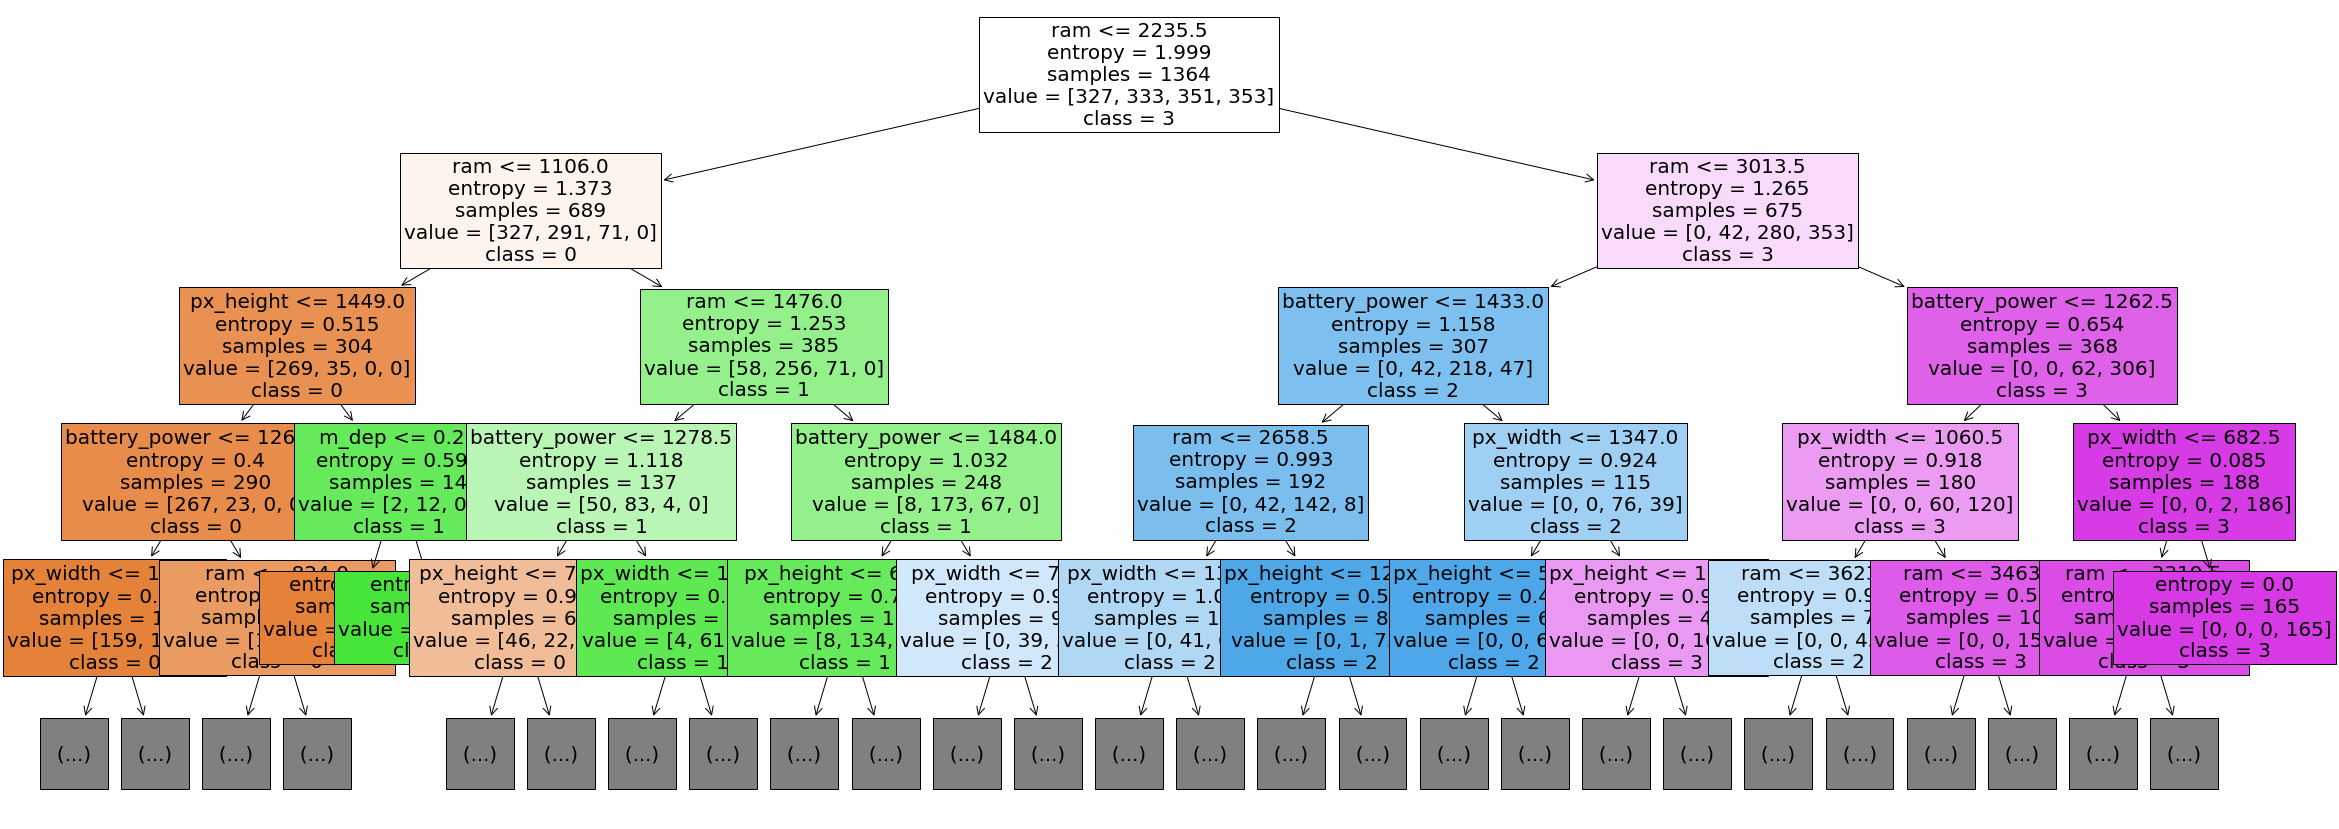

In [22]:
some_features =['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'] # specify our features

target_names = ['0', '1', '2', '3'] # target classes
fig = plt.figure(figsize=(40,15))
plot = tree.plot_tree(DTS, # model
                     feature_names=some_features,# feature names
                     class_names = target_names, # specify targets classes
                     filled=True,
                     fontsize=20,
                    max_depth=4
                     )

fig.savefig("E:\hamid\hushe masnue imt1\Data\Mobile classification\Tree1.png")

## Check for Overfitting

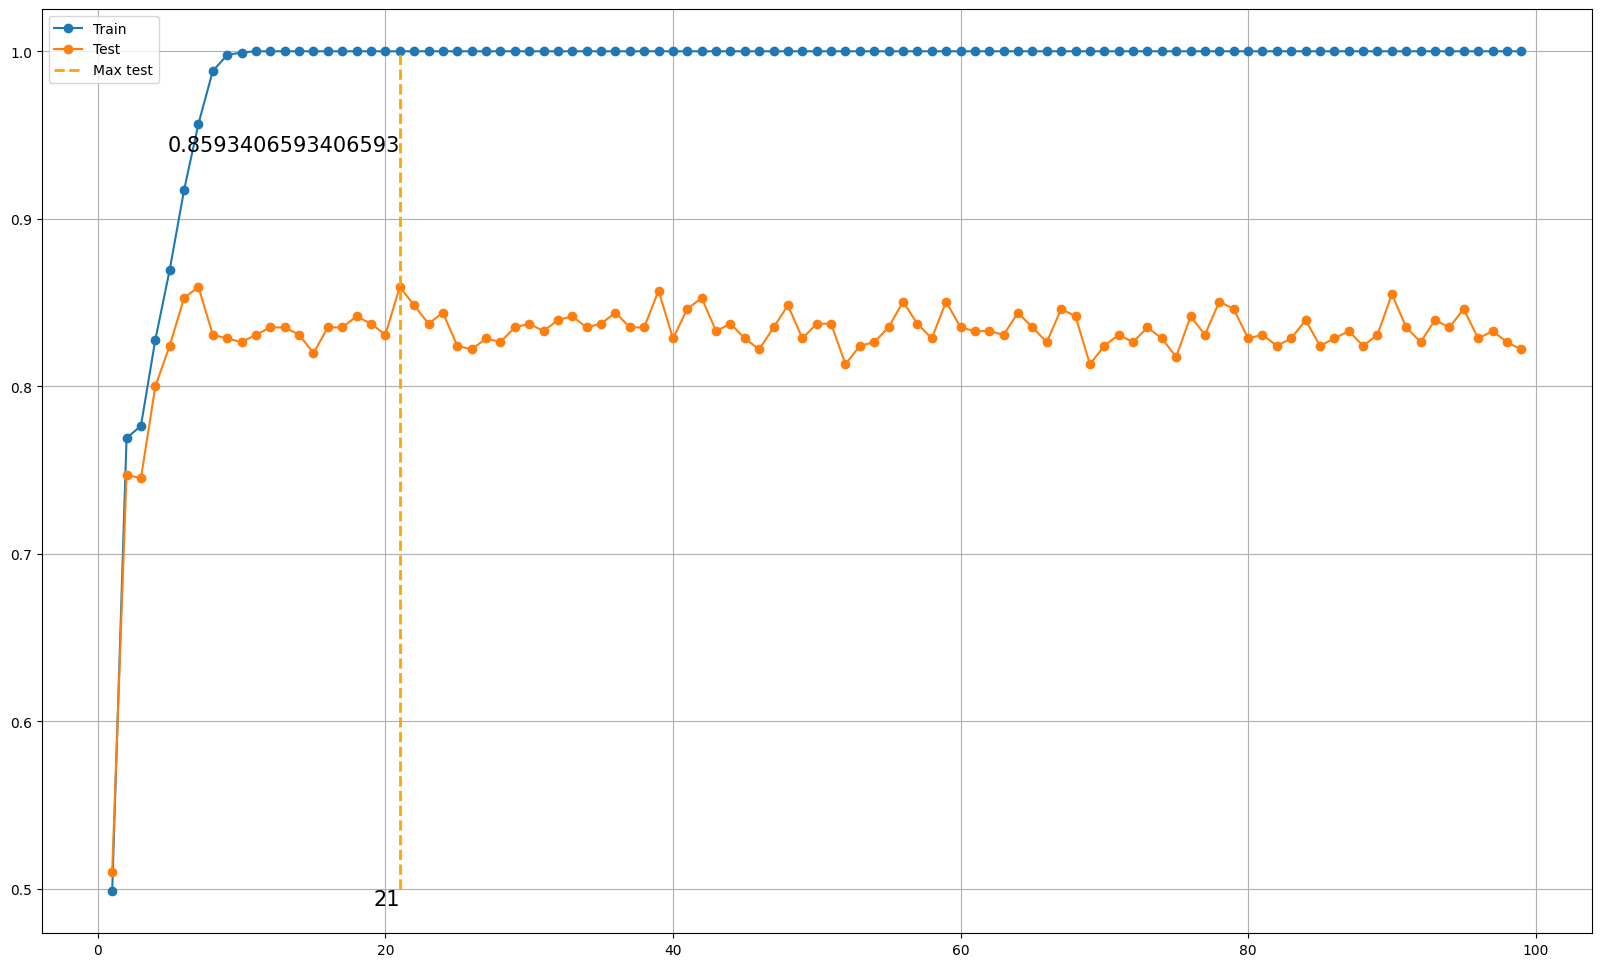

In [33]:
train_scores=[] 
test_scores=[]

# define the tree depths to evaluate 1 to 100
values = np.arange(1,100)
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_pred = model.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_pred = model.predict(x_test)
    test_acc = metrics.accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

# find the number of max_depth in the max test accuracy
best_depth = 0
for i in range(7,99): # range for n_estimator
        if test_scores[i] == max(test_scores): 
            best_depth = i+1 # find best n_estimator by test accuracy
                         

                
# plot of train and test scores vs tree depth
plt.figure(figsize=(20,12))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
# plot best test accuracy 
plt.vlines(ymin=0.5, ymax=1, x = best_depth, color = 'orange',
          linewidth = 2, label = 'Max test', linestyle = 'dashed')
# show number of best test accuracy and max_depth for max test accuracy
plt.text(best_depth, .5,
         str(best_depth),ha='right',  va='top', fontsize=15)
plt.text(best_depth, .95,
         str(max(test_scores)),ha='right',  va='top', fontsize=15)
plt.legend()
plt.grid()
plt.show()

### Predict data test by decision tree

In [24]:
Data_test_DTS = Data_test.copy() # copy of data test

y_pred_DTS = DTS.predict(Data_test) # predict test price range
Data_test_DTS.insert(20,'Prediction DTS',y_pred_DTS) # insert predict price range by DTS
Data_test_DTS

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  Prediction DTS  
0            2        0             1     0               3  
1            7        1             0     0               3  
2           10        0             1     1               3  
3            7        1             1     0               3  
4            7        1             0     1               1  
..         ...      ...           ...   ...             ...  
995         15        1             1     0               2  
996         19        0             1     1               1  
997         14        1             0     0               0  
998          6        0             1     0               2  
999          3        1             0     1               2  

[1000 rows x 21 columns]

In [25]:
Data_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 20 columns]

# Random Forest

In [26]:
x = Data_train_new.drop('price_range',axis=1) # creat x
y = Data_train_new.price_range.values.reshape(-1,1) # creat y and normalized -1,1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1) # split x,y

In [27]:
# GridSearchCV for Random Forest by accuracy evaluate

parameters = {'n_estimators':[2,10,30,50,100],
           'max_depth':[i for i in range(5,16,2)],
           'min_samples_split':[2, 5, 10, 15, 20, 50, 100]} # parameters for Random Forest
grid_kn = GridSearchCV(estimator=RandomForestClassifier(), # Model
                      param_grid= parameters, # Range of depth and ceriterion
                      scoring='accuracy', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1)

grid_kn.fit(x_train, y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   38.1s finished


{'max_depth': 11, 'min_samples_split': 10, 'n_estimators': 100}

In [28]:
# Creat Random forest model by best parameters from gridsearchCV (RF) n_estimator from check overfitting

RF = RandomForestClassifier(n_estimators=100, max_depth=13, criterion='entropy', min_samples_split=5)
RF = RF.fit(x_train, y_train.ravel())
y_pred_RF = RF.predict(x_test) # calculate price range by random forest
RF_Accuracy = metrics.accuracy_score(y_test, y_pred_RF) # creat RF accuracy
print('RF Accuracy : ', RF_Accuracy)

# y_pred_RF_all = RF.predict(x) #predict by all data
# RF_Accuracy_all = metrics.accuracy_score(y, y_pred_RF_all) # calculate accuracy by all data
# print('RF Accuracy all data : ', RF_Accuracy_all) # Calculate accuracy by all data

RF Accuracy :  0.8857142857142857


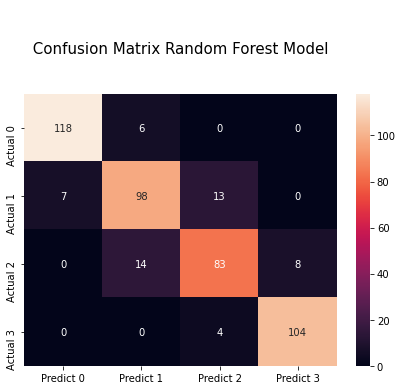


 ---------------- Classification Report Random Forest -------------------

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       124
           1       0.83      0.83      0.83       118
           2       0.83      0.79      0.81       105
           3       0.93      0.96      0.95       108

    accuracy                           0.89       455
   macro avg       0.88      0.88      0.88       455
weighted avg       0.88      0.89      0.88       455



In [29]:
# confusion matrix for test data

confus_matrix = confusion_matrix(y_test, y_pred_RF)
# creat labels for column and row heat map matrix
RF_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1","Actual 2","Actual 3"]], columns = [i for i in ["Predict 0", "Predict 1","Predict 2", "Predict 3"]])
plt.figure(figsize=(7,5))
plt.title('\n\n Confusion Matrix Random Forest Model \n\n ', size=15)
sns.heatmap(RF_cm_df, annot=True, fmt='g') # creat heatmap for confusion matrix by color and write digits
plt.show()

# classification report for test data

print('\n ---------------- Classification Report Random Forest -------------------\n')
print(metrics.classification_report(y_test, y_pred_RF))

## Check for Overfitting

In [30]:
y_pred_RF_train = RF.predict(x_train) # predict for train data
y_pred_RF_test = RF.predict(x_test) # predict for test data
print('Train RF accuracy:',metrics.accuracy_score(y_train, y_pred_RF_train))
print('Test RF accuracy:',metrics.accuracy_score(y_test, y_pred_RF_test))
print('MSE train:', metrics.mean_absolute_error(y_train, y_pred_RF_train))
print('MSE test:', metrics.mean_absolute_error(y_test, y_pred_RF_test))

Train RF accuracy: 1.0
Test RF accuracy: 0.8857142857142857
MSE train: 0.0
MSE test: 0.11428571428571428


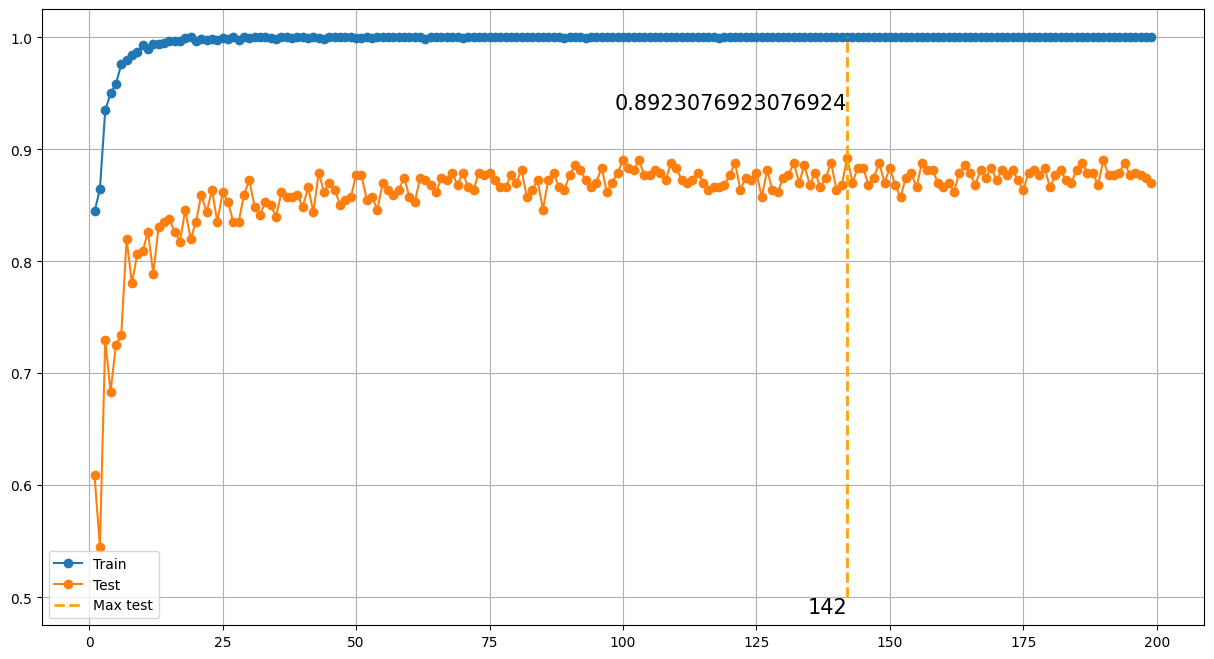

In [35]:

train_scores=[] 
test_scores=[]

# define the tree depths to evaluate 1 to 100
values = np.arange(1,200)
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(n_estimators=i, max_depth=15, criterion='entropy', min_samples_split=5)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_pred = model.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_pred = model.predict(x_test)
    test_acc = metrics.accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

# find the number of n_estimator in the max test accuracy

for i in range(1,199): # range for n_estimator
        if test_scores[i] == max(test_scores): 
            best_estimator = i+1 # find best n_estimator by test accuracy
                         

# plot of train and test scores vs tree depth
plt.figure(figsize=(15,8))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
# plot best test accuracy 
plt.vlines(ymin=0.5, ymax=1, x = best_estimator, color = 'orange',
          linewidth = 2, label = 'Max test', linestyle = 'dashed')
# show number of best test accuracy and n_estimator for max test accuracy
plt.text(best_estimator, .5,
         str(best_estimator),ha='right',  va='top', fontsize=15)
plt.text(best_estimator, .95,
         str(max(test_scores)),ha='right',  va='top', fontsize=15)
plt.legend()
plt.grid()
plt.show()

## Visulization

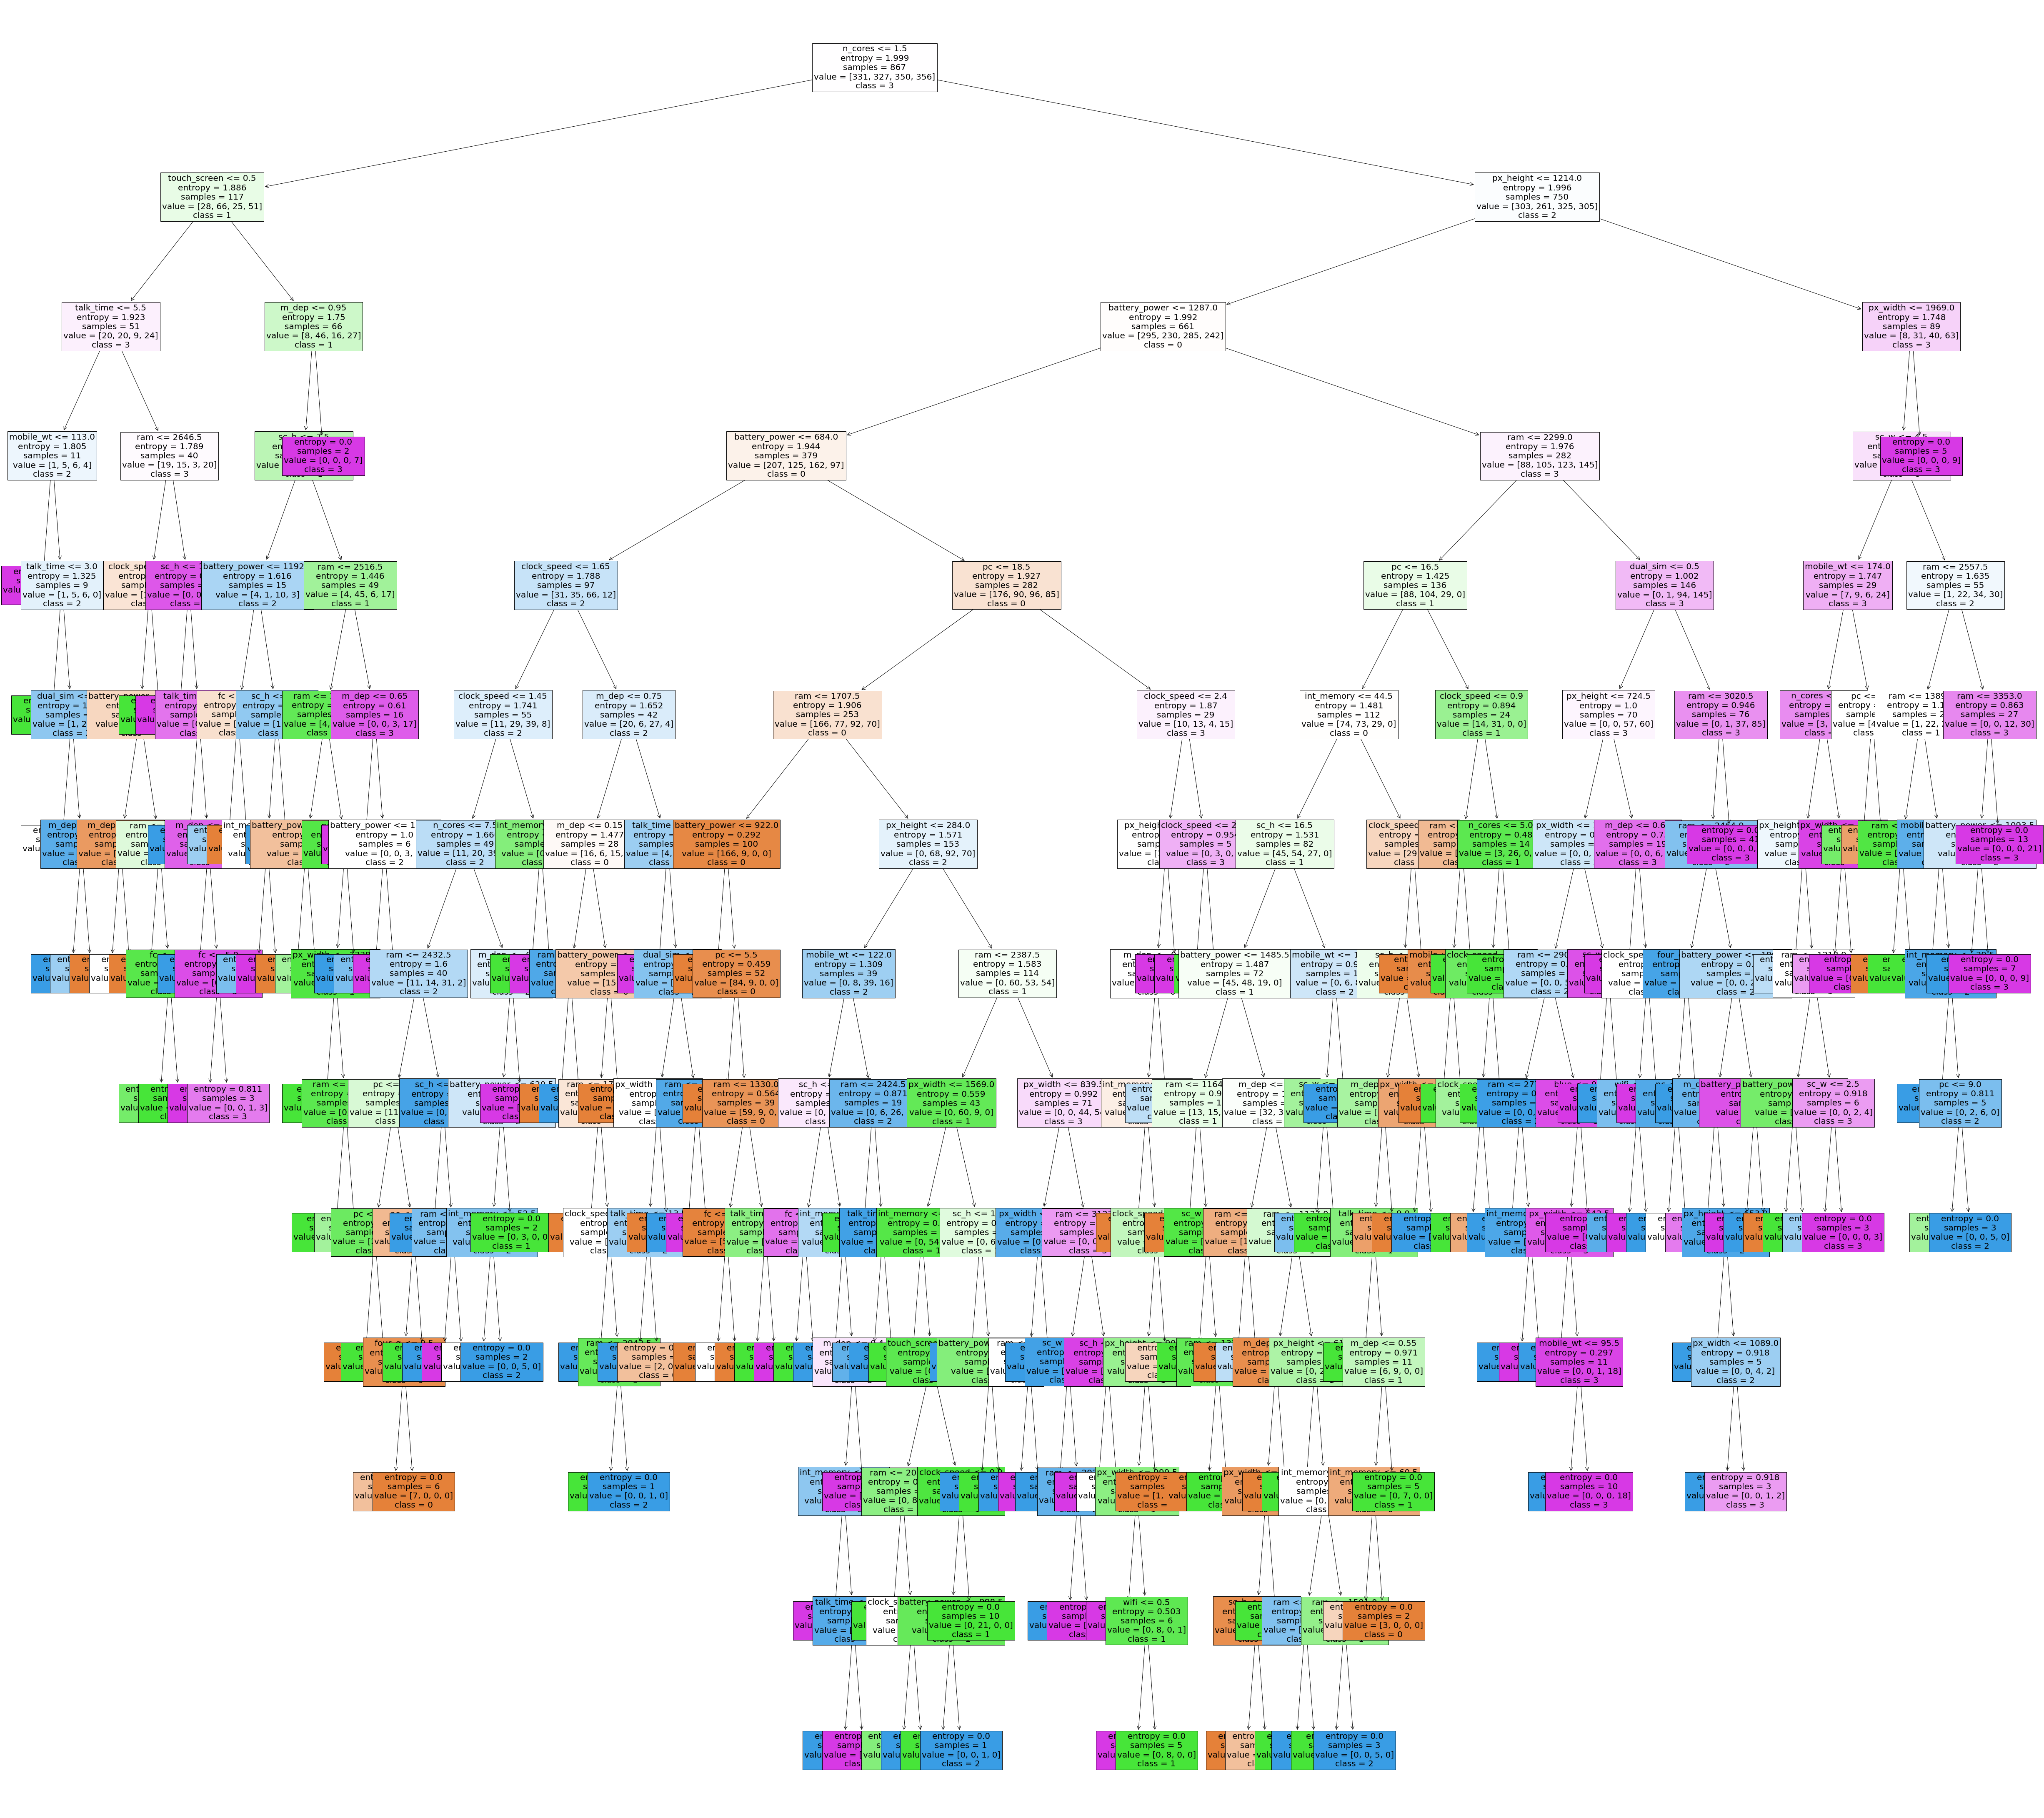

In [32]:
# specifie features
some_features =['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
target_names = ['0', '1', '2', '3'] # target classes
fig = plt.figure(figsize=(85,80))
plot = tree.plot_tree(RF.estimators_[5], # model
                     feature_names=some_features,# feature names
                     class_names = target_names, # target classes
                     filled=True,
                     fontsize=20,
                     )

fig.savefig("E:\hamid\hushe masnue imt1\Data\Mobile classification\RFTree1.png")

### Predict data test by random forest

In [33]:
Data_test_RF = Data_test.copy() # copy of data test

y_pred_RF = RF.predict(Data_test) # predict test price range
Data_test_RF.insert(20,'Prediction RF',y_pred_RF) # insert predict price range by RF
Data_test_RF

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  Prediction RF  
0            2        0             1     0              3  
1            7        1             0     0              3  
2           10        0             1     1              3  
3            7        1             1     0              3  
4            7        1             0     1              1  
..         ...      ...           ...   ...            ...  
995         15        1             1     0              2  
996         19        0             1     1              1  
997         14        1             0     0              0  
998          6        0             1     0              2  
999          3        1             0     1              2  

[1000 rows x 21 columns]

# SVM

In [34]:
x = Data_train_new.drop('price_range',axis=1) # creat x
y = Data_train_new.price_range.values.reshape(-1,1) # creat y and normalized -1,1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1) # split x,y

In [35]:
# GridSearchCV for SVM by accuracy evaluate

parameters = [{ 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma': ['scale', 'auto'],
                     'C': [0.01, 0.1, 1, 10, 100, 1000] }] # parameters for SVM
grid_kn = GridSearchCV(estimator=SVC(), # Model
                      param_grid= parameters, # Parameters for model
                      scoring='accuracy', # Strategy to evaluation the performance
                      cv = 5, # cross_validation generator
                      verbose=1, # Time to calculate
                      n_jobs = -1)

grid_kn.fit(x_train, y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.0min finished


{'C': 1000, 'gamma': 'scale', 'kernel': 'poly'}

In [36]:
# Creat Decision tree model by best parameters from gridsearchCV (svm) pick C=100 from checking overfitting

Svm = SVC(kernel='poly', gamma='scale', C=1000)
Svm.fit(x_train, y_train.ravel())

y_pred_svm = Svm.predict(x_test) # predict price range for x_test
svm_Accuracy = metrics.accuracy_score(y_test, y_pred_svm) # Calculate accuracy
print('Svm Accuracy : ', svm_Accuracy) 

# y_pred_svm_all = Svm.predict(x) #predict by all data
# svm_Accuracy_all = metrics.accuracy_score(y, y_pred_svm_all) # calculate accuracy by all data
# print('svm Accuracy all data : ', svm_Accuracy_all) # Calculate accuracy by all data

Svm Accuracy :  0.9714285714285714


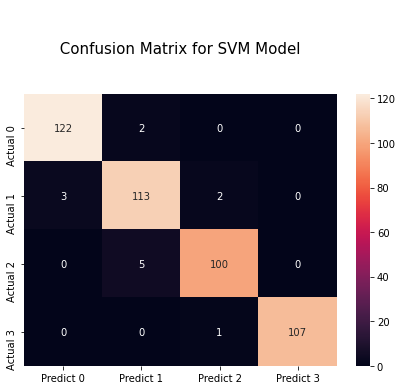


 ---------------- Classification Report SVM Model-------------------

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.96      0.95       118
           2       0.97      0.95      0.96       105
           3       1.00      0.99      1.00       108

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [37]:
# confusion matrix for test

confus_matrix = confusion_matrix(y_test, y_pred_svm) # calculate confusion matrix
# creat columns and rows confusion matrix in heatmap
svm_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1","Actual 2","Actual 3"]], columns = [i for i in ["Predict 0", "Predict 1","Predict 2", "Predict 3"]])
plt.figure(figsize=(7,5))
plt.title('\n\n Confusion Matrix for SVM Model \n\n ', size=15)
sns.heatmap(svm_cm_df, annot=True, fmt='g') # creat heatmap
plt.show()

# classification report for test

print('\n ---------------- Classification Report SVM Model-------------------\n')
print(metrics.classification_report(y_test, y_pred_svm))

## Check Overfitting

In [38]:
y_pred_svm_train = Svm.predict(x_train)
y_pred_svm_test = Svm.predict(x_test)
print('Train SVM Accuracy:',metrics.accuracy_score(y_train, y_pred_svm_train))
print('Test SVM Accuracy:',metrics.accuracy_score(y_test, y_pred_svm_test))
print('MSE train SVM:', metrics.mean_absolute_error(y_train, y_pred_svm_train))
print('MSE test SVM:', metrics.mean_absolute_error(y_test, y_pred_svm_test))

Train SVM Accuracy: 0.9912023460410557
Test SVM Accuracy: 0.9714285714285714
MSE train SVM: 0.008797653958944282
MSE test SVM: 0.02857142857142857


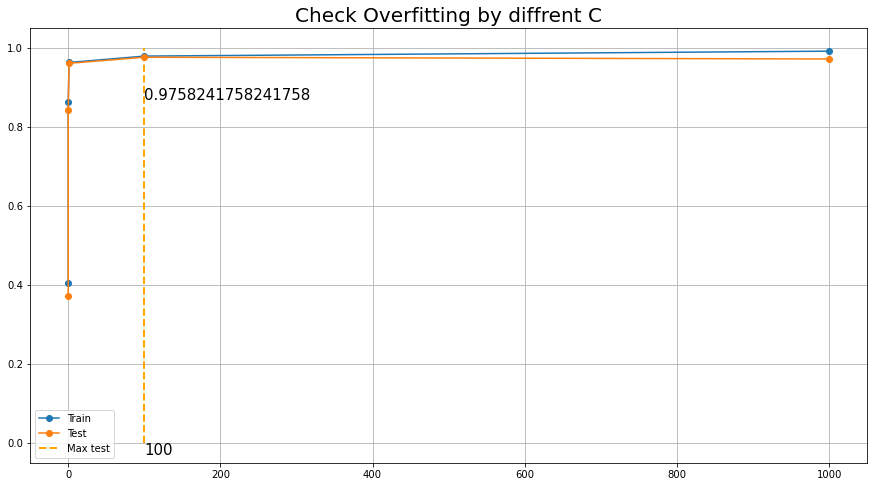

In [39]:

train_scores=[] 
test_scores=[]

# define the tree depths to evaluate 1 to 100
values = [0.001,0.01,1,100,1000]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = SVC(kernel='poly', gamma='scale', C=i)
    # fit model on the training dataset
    model.fit(x_train, y_train)
    # evaluate on the train dataset
    train_pred = model.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_pred = model.predict(x_test)
    test_acc = metrics.accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

# find the number of n_estimator in the max test accuracy

for count,value in enumerate(values): # range for C
        if test_scores[count] == max(test_scores): 
            best_C = value # find best C by test accuracy
                         

# plot of train and test scores vs tree depth
plt.figure(figsize=(15,8))
plt.title('Check Overfitting by diffrent C', fontsize=20)
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
# plot max test accuracy
plt.vlines(ymin=0.0, ymax=1, x = best_C, color = 'orange',
          linewidth = 2, label = 'Max test', linestyle = 'dashed')
# show text max test accuracy and best C by test accuracy
plt.text(best_C, .0,
         str(best_C),ha='left',  va='top', fontsize=15)
plt.text(best_C, .9,
         str(max(test_scores)),ha='left',  va='top', fontsize=15)
plt.legend()
plt.grid()
plt.show()

### Predict test data by svm

In [40]:
Data_test_svm = Data_test.copy() # copy of data test

y_pred_svm = Svm.predict(Data_test) # predict test price range
Data_test_svm.insert(20,'Prediction svm',y_pred_svm) # insert predict price range by svm
Data_test_svm

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  Prediction svm  
0            2        0             1     0               3  
1            7        1             0     0               3  
2           10        0             1     1               2  
3            7        1             1     0               3  
4            7        1             0     1               1  
..         ...      ...           ...   ...             ...  
995         15        1             1     0               2  
996         19        0             1     1               1  
997         14        1             0     0               0  
998          6        0             1     0               2  
999          3        1             0     1               2  

[1000 rows x 21 columns]

# Comperision Models

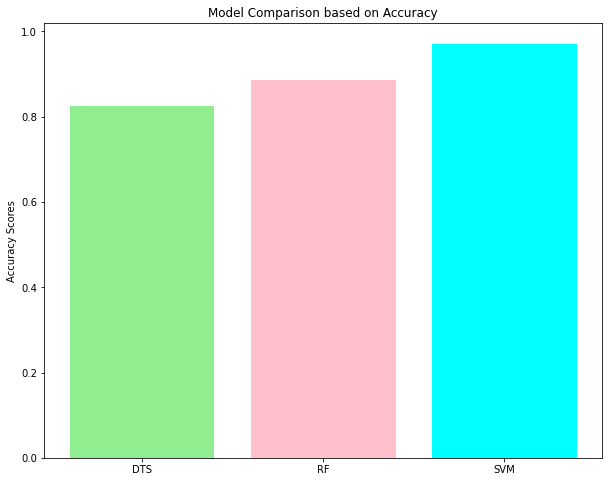

In [41]:
# comparison models visualizzation
models = ['DTS','RF','SVM'] # model names
acc_scores = [DTS_Accuracy,RF_Accuracy,svm_Accuracy] # every models accuracy score
plt.figure(figsize=(10,8))
plt.bar(models, acc_scores, color=['lightgreen', 'pink', 'cyan']) # plot bar 
plt.ylabel("Accuracy Scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

### SVM has the best accuracy for our data set in train and test data

# Svm has atleast missclassification by actual data 